# Compensación de Luces con Pillow

In [ ]:
#REVISADO
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Abrir una imagen
imagen = Image.open('lun3.jpg')

# Aumentar el brillo (2.0 multiplica el brillo actual)
enhancer = ImageEnhance.Brightness(imagen)
imagen_brillante = enhancer.enhance(1.3)

# Crear una figura de Matplotlib para mostrar las imágenes
plt.figure(figsize=(12, 6))

# Mostrar la imagen original en la primera subtrama
plt.subplot(121)
plt.imshow(imagen)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen con brillo aumentado en la segunda subtrama
plt.subplot(122)
plt.imshow(imagen_brillante)
plt.title('Imagen con Brillo Aumentado')
plt.axis('off')

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar la figura con ambas imágenes
plt.show()


# Corrección Gamma con Pillow - ELIMINADO

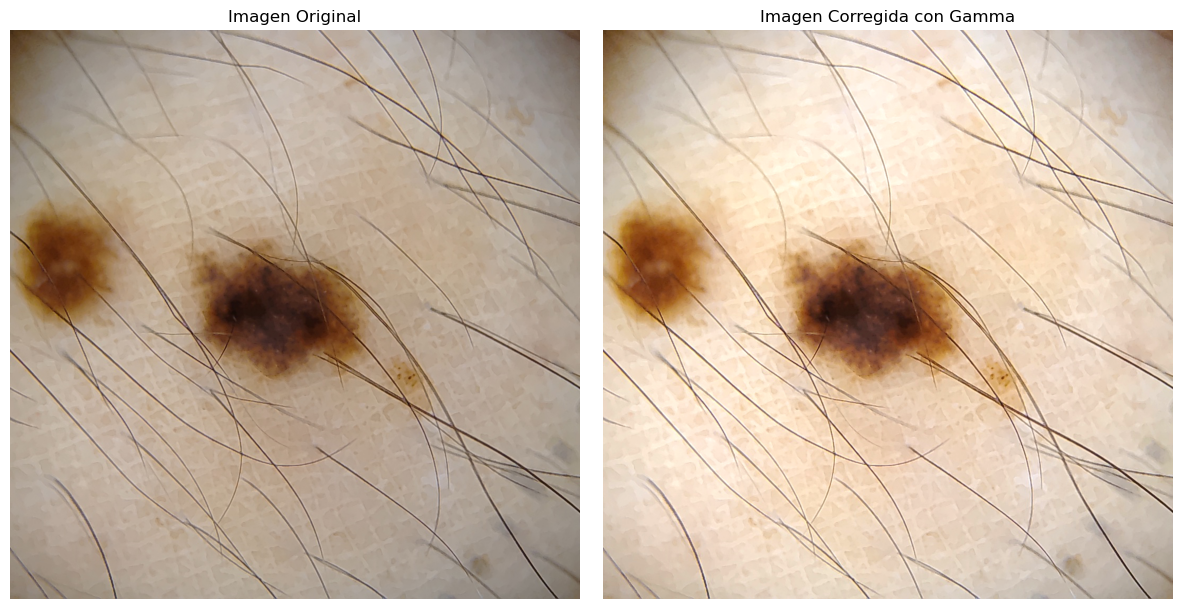

In [1]:
#REVISADO
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Abrir una imagen
imagen = Image.open('miche.jpg')

# Ajustar el valor gamma (2.0 para aumento, <1.0 para reducción)
gamma = 1.3
imagen_corregida = ImageEnhance.Brightness(imagen).enhance(gamma)

# Crear una figura de Matplotlib para mostrar las imágenes
plt.figure(figsize=(12, 6))

# Mostrar la imagen original en la primera subtrama
plt.subplot(121)
plt.imshow(imagen)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen corregida con gamma en la segunda subtrama
plt.subplot(122)
plt.imshow(imagen_corregida)
plt.title('Imagen Corregida con Gamma')
plt.axis('off')

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar la figura con ambas imágenes
plt.show()



# Mascara de desenfoque

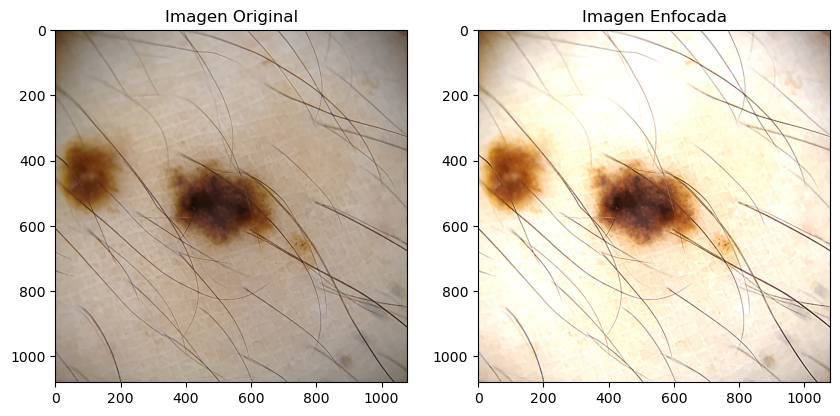

In [5]:
#REVISADO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen a color
imagen = cv2.imread('miche.jpg')

# Aplicar un filtro de máscara de desenfoque
sharpened = cv2.addWeighted(imagen, 2, cv2.GaussianBlur(imagen, (0, 0), 2), -0.5, 0)

# Mostrar la imagen original y la imagen enfocada en la misma página
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)), plt.title('Imagen Enfocada')
plt.show()

# Corrección de Exposición y Balance de Color

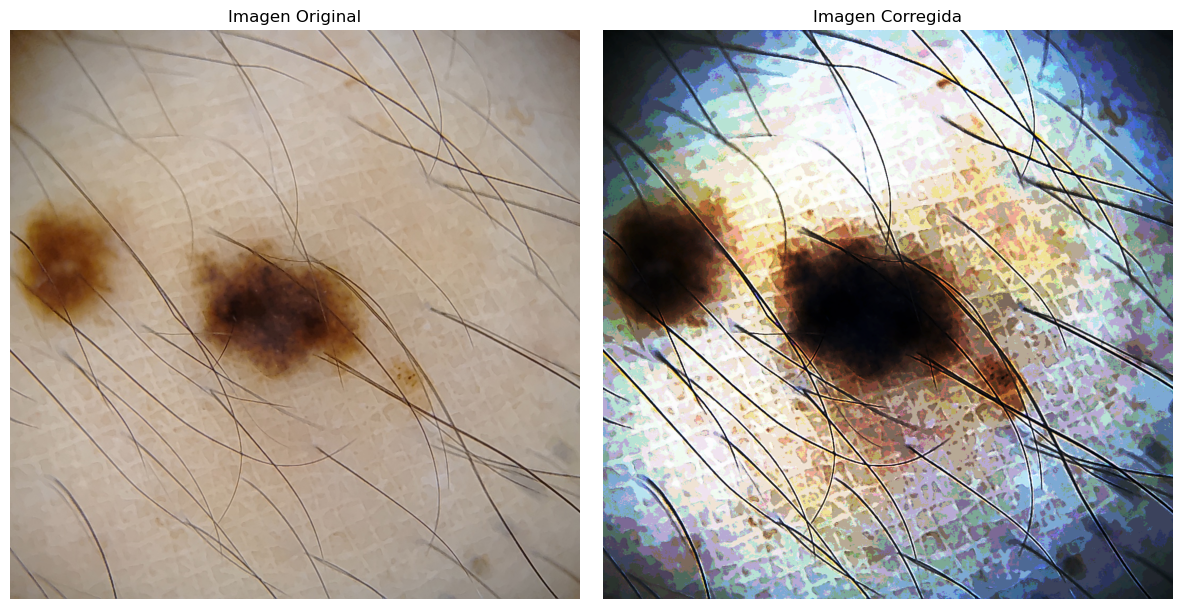

In [12]:
#REVISADO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = cv2.imread('miche.jpg')

# Corrección de exposición: Ajustar el brillo y el contraste
alpha = 0.1  # Factor de contraste
beta = 0.5    # Valor de brillo
imagen_corregida = cv2.convertScaleAbs(imagen, alpha=alpha, beta=beta)

# Balance de color: Ajustar el equilibrio de color
# Esto puede variar dependiendo de los canales de color de tu imagen
canal_azul, canal_verde, canal_rojo = cv2.split(imagen_corregida)
canal_azul = cv2.equalizeHist(canal_azul)
canal_verde = cv2.equalizeHist(canal_verde)
canal_rojo = cv2.equalizeHist(canal_rojo)
imagen_balanceada = cv2.merge((canal_azul, canal_verde, canal_rojo))

# Mostrar la imagen original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen corregida
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagen_balanceada, cv2.COLOR_BGR2RGB))
plt.title('Imagen Corregida')
plt.axis('off')

# Mostrar las imágenes con matplotlib
plt.tight_layout()
plt.show()



# Funcion gamma skimage -  opencv

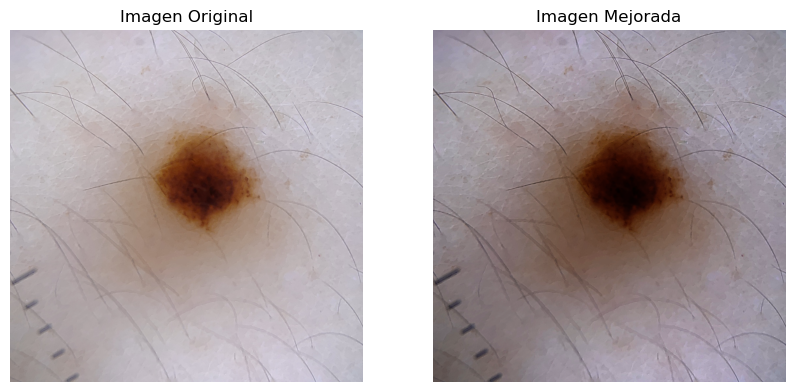

In [15]:
#REVISADO
from skimage import io, exposure
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = io.imread('lun6.jpg')

# Ajustar el contraste mediante ajuste de gamma
gamma = 1.8  # Ajusta este valor según tus necesidades
imagen_mejorada = exposure.adjust_gamma(imagen, gamma)

# Crear una figura con dos subtramas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la imagen original en la primera subtrama
axes[0].imshow(imagen, cmap='gray')
axes[0].set_title('Imagen Original')

# Mostrar la imagen mejorada en la segunda subtrama
axes[1].imshow(imagen_mejorada, cmap='gray')
axes[1].set_title('Imagen Mejorada')

# Ajustar los ejes
for ax in axes:
    ax.axis('off')

# Mostrar la figura
plt.show()

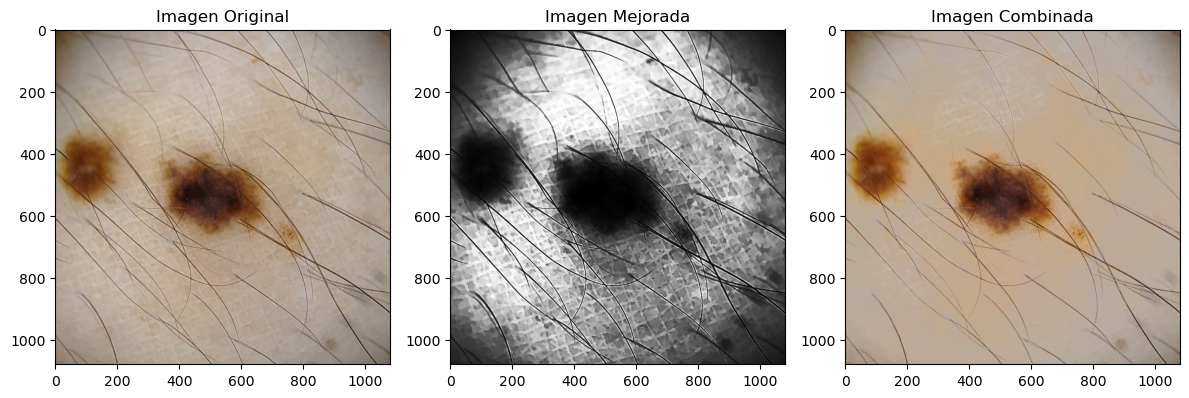

In [20]:
#REVISADO
import cv2
import matplotlib.pyplot as plt
from skimage import exposure

# Cargar la imagen
imagen = cv2.imread('miche.jpg')

# Convertir la imagen a escala de grises (opcional, dependiendo de la técnica)
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Aplicar la técnica de mejora de contraste (por ejemplo, ecualización del histograma)
imagen_mejorada = exposure.equalize_hist(imagen_gris) * 255  # Escalar la imagen de 0-1 a 0-255

# Mezclar la imagen original con la imagen modificada
alpha = 1.2  # Ajusta este valor según tus necesidades
imagen_combinada = cv2.addWeighted(imagen, alpha, cv2.cvtColor(imagen_mejorada.astype('uint8'), cv2.COLOR_GRAY2BGR), 1 - alpha, 0)

# Crear una figura de Matplotlib para mostrar las imágenes
plt.figure(figsize=(12, 6))

# Mostrar la imagen original con título
plt.subplot(131)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para Matplotlib
plt.title('Imagen Original')

# Mostrar la imagen mejorada con título
plt.subplot(132)
plt.imshow(imagen_mejorada, cmap='gray', vmin=0, vmax=255)
plt.title('Imagen Mejorada')

# Mostrar la imagen combinada con título
plt.subplot(133)
plt.imshow(cv2.cvtColor(imagen_combinada, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para Matplotlib
plt.title('Imagen Combinada')

# Ajustar el espacio entre las imágenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Filtro bilateral

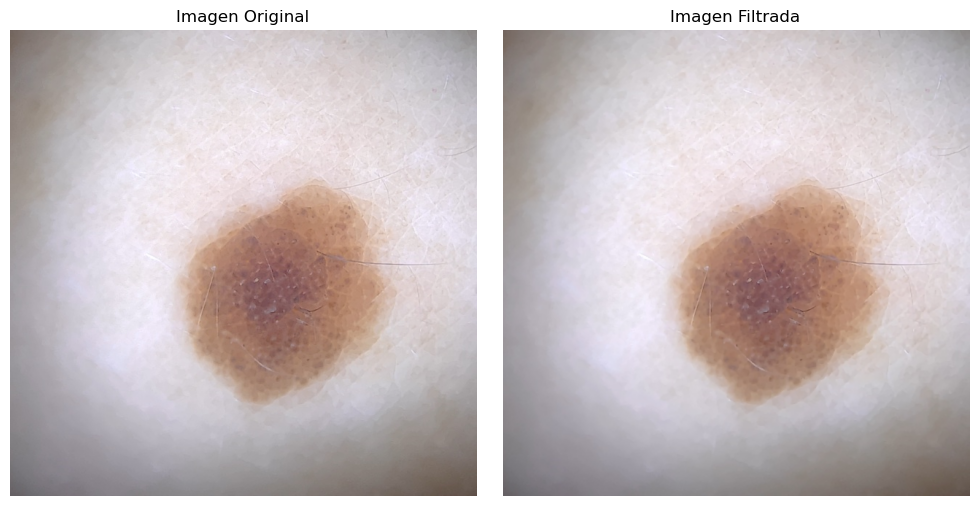

In [27]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen de dermatoscopia
imagen = cv2.imread('dallana.jpg', cv2.IMREAD_COLOR)

# Definir los parámetros del filtrado bilateral
d = 1  # Diámetro de la vecindad para el filtrado
sigma_color = 15  # Valor de desviación estándar para los componentes de color
sigma_space = 15  # Valor de desviación estándar para los componentes espaciales

# Aplicar el filtrado bilateral
imagen_filtrada = cv2.bilateralFilter(imagen, d, sigma_color, sigma_space)

# Crear una figura con dos subtramas
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la imagen original en la primera subtrama
axs[0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))  # Convierte BGR a RGB
axs[0].set_title('Imagen Original')
axs[0].axis('off')

# Mostrar la imagen filtrada en la segunda subtrama
axs[1].imshow(cv2.cvtColor(imagen_filtrada, cv2.COLOR_BGR2RGB))  # Convierte BGR a RGB
axs[1].set_title('Imagen Filtrada')
axs[1].axis('off')

# Ajustar el espacio entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()


# Filtro no local

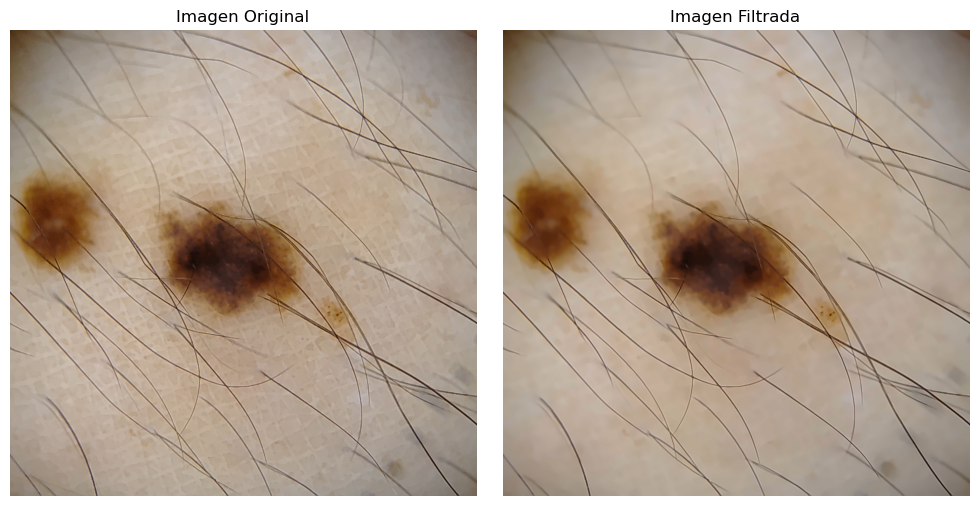

In [28]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen de dermatoscopia
imagen = cv2.imread('miche.jpg', cv2.IMREAD_COLOR)

# Definir los parámetros del filtrado no local
h = 5  # Parámetro de control de similitud (mayor valor significa menos suavizado)
h_for_color_components = 2  # Parámetro de control de similitud para componentes de color

# Aplicar el filtrado no local
imagen_filtrada = cv2.fastNlMeansDenoisingColored(imagen, None, h, h_for_color_components)

# Crear una figura con dos subtramas
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la imagen original en la primera subtrama
axs[0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))  # Convierte BGR a RGB
axs[0].set_title('Imagen Original')
axs[0].axis('off')

# Mostrar la imagen filtrada en la segunda subtrama
axs[1].imshow(cv2.cvtColor(imagen_filtrada, cv2.COLOR_BGR2RGB))  # Convierte BGR a RGB
axs[1].set_title('Imagen Filtrada')
axs[1].axis('off')

# Ajustar el espacio entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()
